In [ ]:
# https://datascienceschool.net/03%20machine%20learning/09.01%20%EB%B6%84%EB%A5%98%EC%9A%A9%20%EC%98%88%EC%A0%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0.html

# 1. 데이터 전처리

In [28]:
import pandas as pd
import numpy as np

In [31]:
train = pd.read_csv("train.csv")
train

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.7300,0.000000,0.0843,0.6250,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.8320,0.196000,0.1530,0.1660,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.1390,0.000077,0.0934,0.1160,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.4380,0.000006,0.1130,0.5870,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.9320,0.000000,0.1370,0.4450,-3.604,0.1060,169.881,1,4,Energetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,windcatcher,windcatcher,Leo Nocta,59VApBbrS2IADQk4ml5mdo,2020-06-19,36,123066,0.402,0.96100,0.2360,0.919000,0.0921,0.1460,-20.615,0.0603,129.736,0,3,Calm
682,yellow is the color of her eyes,yellow is the color of her eyes,Soccer Mommy,4D3nttJPU6L0M2epr7sId6,2019-11-19,5,435080,0.452,0.75700,0.5150,0.120000,0.1400,0.1910,-7.351,0.0255,80.537,11,4,Sad
683,you broke me first,you broke me first,Tate McRae,45bE4HXI0AwGZXfZtMp8JR,2020-04-17,87,169265,0.642,0.78600,0.3740,0.000000,0.0906,0.0799,-9.386,0.0545,124.099,4,4,Sad
684,you were good to me,brent,Jeremy Zucker,4CxFN5zON70B3VOPBYbd6P,2019-05-03,76,219146,0.561,0.91300,0.0848,0.000026,0.1120,0.2060,-15.099,0.0404,102.128,2,4,Sad


In [68]:
test = pd.read_csv("2022_unique.csv")
test

,Unnamed: 0,artist_name,track_name,track_id,year,market,track_popularity,artist_id,danceability,energy,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,David Bowie,Starman - 2012 Remaster,0pQskrTITgmCMyr85tb9qq,1972,KR,75,0oSGxfWSnnOXhD2fKuz2Gy,0.486,0.449,...,0.54,0.549,100.456,audio_features,0pQskrTITgmCMyr85tb9qq,spotify:track:0pQskrTITgmCMyr85tb9qq,https://api.spotify.com/v1/tracks/0pQskrTITgmC...,https://api.spotify.com/v1/audio-analysis/0pQs...,254293,4
1,1,Al Green,Let's Stay Together,63xdwScd1Ai1GigAwQxE8y,1972,KR,74,3dkbV4qihUeMsqN4vBGg93,0.756,0.401,...,0.0541,0.514,101.954,audio_features,63xdwScd1Ai1GigAwQxE8y,spotify:track:63xdwScd1Ai1GigAwQxE8y,https://api.spotify.com/v1/tracks/63xdwScd1Ai1...,https://api.spotify.com/v1/audio-analysis/63xd...,199396,4
2,2,Elton John,"Rocket Man (I Think It's Going To Be A Long, L...",3gdewACMIVMEWVbyb8O9sY,1972,KR,80,3PhoLpVuITZKcymswpck5b,0.601,0.532,...,0.0925,0.341,136.571,audio_features,3gdewACMIVMEWVbyb8O9sY,spotify:track:3gdewACMIVMEWVbyb8O9sY,https://api.spotify.com/v1/tracks/3gdewACMIVME...,https://api.spotify.com/v1/audio-analysis/3gde...,281613,4
3,3,Deep Purple,Smoke On The Water - Remastered 2012,5MMnwYs0hIxkENRsbkWJ2G,1972,KR,73,568ZhdwyaiCyOGJRtNYhWf,0.598,0.676,...,0.112,0.805,114.169,audio_features,5MMnwYs0hIxkENRsbkWJ2G,spotify:track:5MMnwYs0hIxkENRsbkWJ2G,https://api.spotify.com/v1/tracks/5MMnwYs0hIxk...,https://api.spotify.com/v1/audio-analysis/5MMn...,340742,4
4,4,Carpenters,Top Of The World,1Ehdm1PDlKrdfyBsjwEvd1,1972,KR,67,1eEfMU2AhEo7XnKgL7c304,0.379,0.343,...,0.0991,0.694,184.301,audio_features,1Ehdm1PDlKrdfyBsjwEvd1,spotify:track:1Ehdm1PDlKrdfyBsjwEvd1,https://api.spotify.com/v1/tracks/1Ehdm1PDlKrd...,https://api.spotify.com/v1/audio-analysis/1Ehd...,179173,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82010,990,Maluma,Nos Comemos Vivos,3SlKme42qm1vWrkl3BrZmm,2022,GL,82,1r4hJ1h58CWwUQe3MxPuau,0.822,0.719,...,0.174,0.659,82.01,audio_features,3SlKme42qm1vWrkl3BrZmm,spotify:track:3SlKme42qm1vWrkl3BrZmm,https://api.spotify.com/v1/tracks/3SlKme42qm1v...,https://api.spotify.com/v1/audio-analysis/3SlK...,225366,4
82011,992,ITZY,SNEAKERS,2WoluqyWzsgRmFCeHeGlnm,2022,GL,79,2KC9Qb60EaY0kW4eH68vr3,0.935,0.849,...,0.0223,0.551,119.986,audio_features,2WoluqyWzsgRmFCeHeGlnm,spotify:track:2WoluqyWzsgRmFCeHeGlnm,https://api.spotify.com/v1/tracks/2WoluqyWzsgR...,https://api.spotify.com/v1/audio-analysis/2Wol...,179453,4
82012,994,42 Dugg,IDGAF,3umPlMokEzAFxJO33tNdlY,2022,GL,69,45gHcnDnMC15sgx3VL7ROG,0.514,0.611,...,0.312,0.311,108.666,audio_features,3umPlMokEzAFxJO33tNdlY,spotify:track:3umPlMokEzAFxJO33tNdlY,https://api.spotify.com/v1/tracks/3umPlMokEzAF...,https://api.spotify.com/v1/audio-analysis/3umP...,138673,5
82013,996,NLE Choppa,Slut Me Out,5BmB3OaQyYXCqRyN8iR2Yi,2022,GL,70,0ErzCpIMyLcjPiwT4elrtZ,0.938,0.606,...,0.528,0.706,121.108,audio_features,5BmB3OaQyYXCqRyN8iR2Yi,spotify:track:5BmB3OaQyYXCqRyN8iR2Yi,https://api.spotify.com/v1/tracks/5BmB3OaQyYXC...,https://api.spotify.com/v1/audio-analysis/5BmB...,123673,4


In [32]:
train.columns

Index(['name', 'album', 'artist', 'id', 'release_date', 'popularity', 'length',
       'danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'valence', 'loudness', 'speechiness', 'tempo', 'key',
       'time_signature', 'mood'],
      dtype='object')

In [34]:
train = pd.DataFrame(train, columns = ['danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'valence', 'loudness', 'speechiness', 'tempo', 'key',
       'time_signature', 'mood'])

train

,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,0.866,0.13700,0.7300,0.000000,0.0843,0.6250,-8.201,0.0767,118.523,5,4,Happy
1,0.381,0.01890,0.8320,0.196000,0.1530,0.1660,-5.069,0.0492,120.255,8,4,Sad
2,0.346,0.91300,0.1390,0.000077,0.0934,0.1160,-15.326,0.0321,136.168,0,4,Sad
3,0.466,0.08900,0.4380,0.000006,0.1130,0.5870,-12.858,0.0608,193.100,4,4,Happy
4,0.419,0.00171,0.9320,0.000000,0.1370,0.4450,-3.604,0.1060,169.881,1,4,Energetic
...,...,...,...,...,...,...,...,...,...,...,...,...
681,0.402,0.96100,0.2360,0.919000,0.0921,0.1460,-20.615,0.0603,129.736,0,3,Calm
682,0.452,0.75700,0.5150,0.120000,0.1400,0.1910,-7.351,0.0255,80.537,11,4,Sad
683,0.642,0.78600,0.3740,0.000000,0.0906,0.0799,-9.386,0.0545,124.099,4,4,Sad
684,0.561,0.91300,0.0848,0.000026,0.1120,0.2060,-15.099,0.0404,102.128,2,4,Sad


In [39]:
train['mood'] = train['mood'].astype('category').cat.codes

In [40]:
train

,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,0.866,0.13700,0.7300,0.000000,0.0843,0.6250,-8.201,0.0767,118.523,5,4,2
1,0.381,0.01890,0.8320,0.196000,0.1530,0.1660,-5.069,0.0492,120.255,8,4,3
2,0.346,0.91300,0.1390,0.000077,0.0934,0.1160,-15.326,0.0321,136.168,0,4,3
3,0.466,0.08900,0.4380,0.000006,0.1130,0.5870,-12.858,0.0608,193.100,4,4,2
4,0.419,0.00171,0.9320,0.000000,0.1370,0.4450,-3.604,0.1060,169.881,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
681,0.402,0.96100,0.2360,0.919000,0.0921,0.1460,-20.615,0.0603,129.736,0,3,0
682,0.452,0.75700,0.5150,0.120000,0.1400,0.1910,-7.351,0.0255,80.537,11,4,3
683,0.642,0.78600,0.3740,0.000000,0.0906,0.0799,-9.386,0.0545,124.099,4,4,3
684,0.561,0.91300,0.0848,0.000026,0.1120,0.2060,-15.099,0.0404,102.128,2,4,3


In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      686 non-null    float64
 1   acousticness      686 non-null    float64
 2   energy            686 non-null    float64
 3   instrumentalness  686 non-null    float64
 4   liveness          686 non-null    float64
 5   valence           686 non-null    float64
 6   loudness          686 non-null    float64
 7   speechiness       686 non-null    float64
 8   tempo             686 non-null    float64
 9   key               686 non-null    int64  
 10  time_signature    686 non-null    int64  
 11  mood              686 non-null    int8   
dtypes: float64(9), int64(2), int8(1)
memory usage: 59.7 KB


In [47]:
train.describe()

,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,0.500553,0.449749,0.507693,0.349610,0.166867,0.342438,-11.531020,0.053946,119.134679,5.335277,3.870262,1.494169
std,0.158955,0.410729,0.326490,0.410517,0.142128,0.252304,7.468629,0.041374,28.978685,3.550858,0.500297,1.181040
min,0.078900,0.000005,0.001290,0.000000,0.031800,0.035300,-42.018000,0.023200,50.960000,0.000000,1.000000,0.000000
25%,0.388000,0.014825,0.202000,0.000034,0.092500,0.131250,-15.858750,0.033200,99.008750,2.000000,4.000000,0.000000
50%,0.505000,0.359000,0.495500,0.026350,0.111000,0.282000,-9.358000,0.040700,120.071000,6.000000,4.000000,1.000000
75%,0.612000,0.905750,0.844000,0.858250,0.173750,0.508750,-5.634500,0.057375,132.953250,9.000000,4.000000,3.000000
max,0.941000,0.996000,0.994000,0.966000,0.963000,0.977000,1.342000,0.416000,217.950000,11.000000,5.000000,3.000000


 ### 시각화

In [50]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

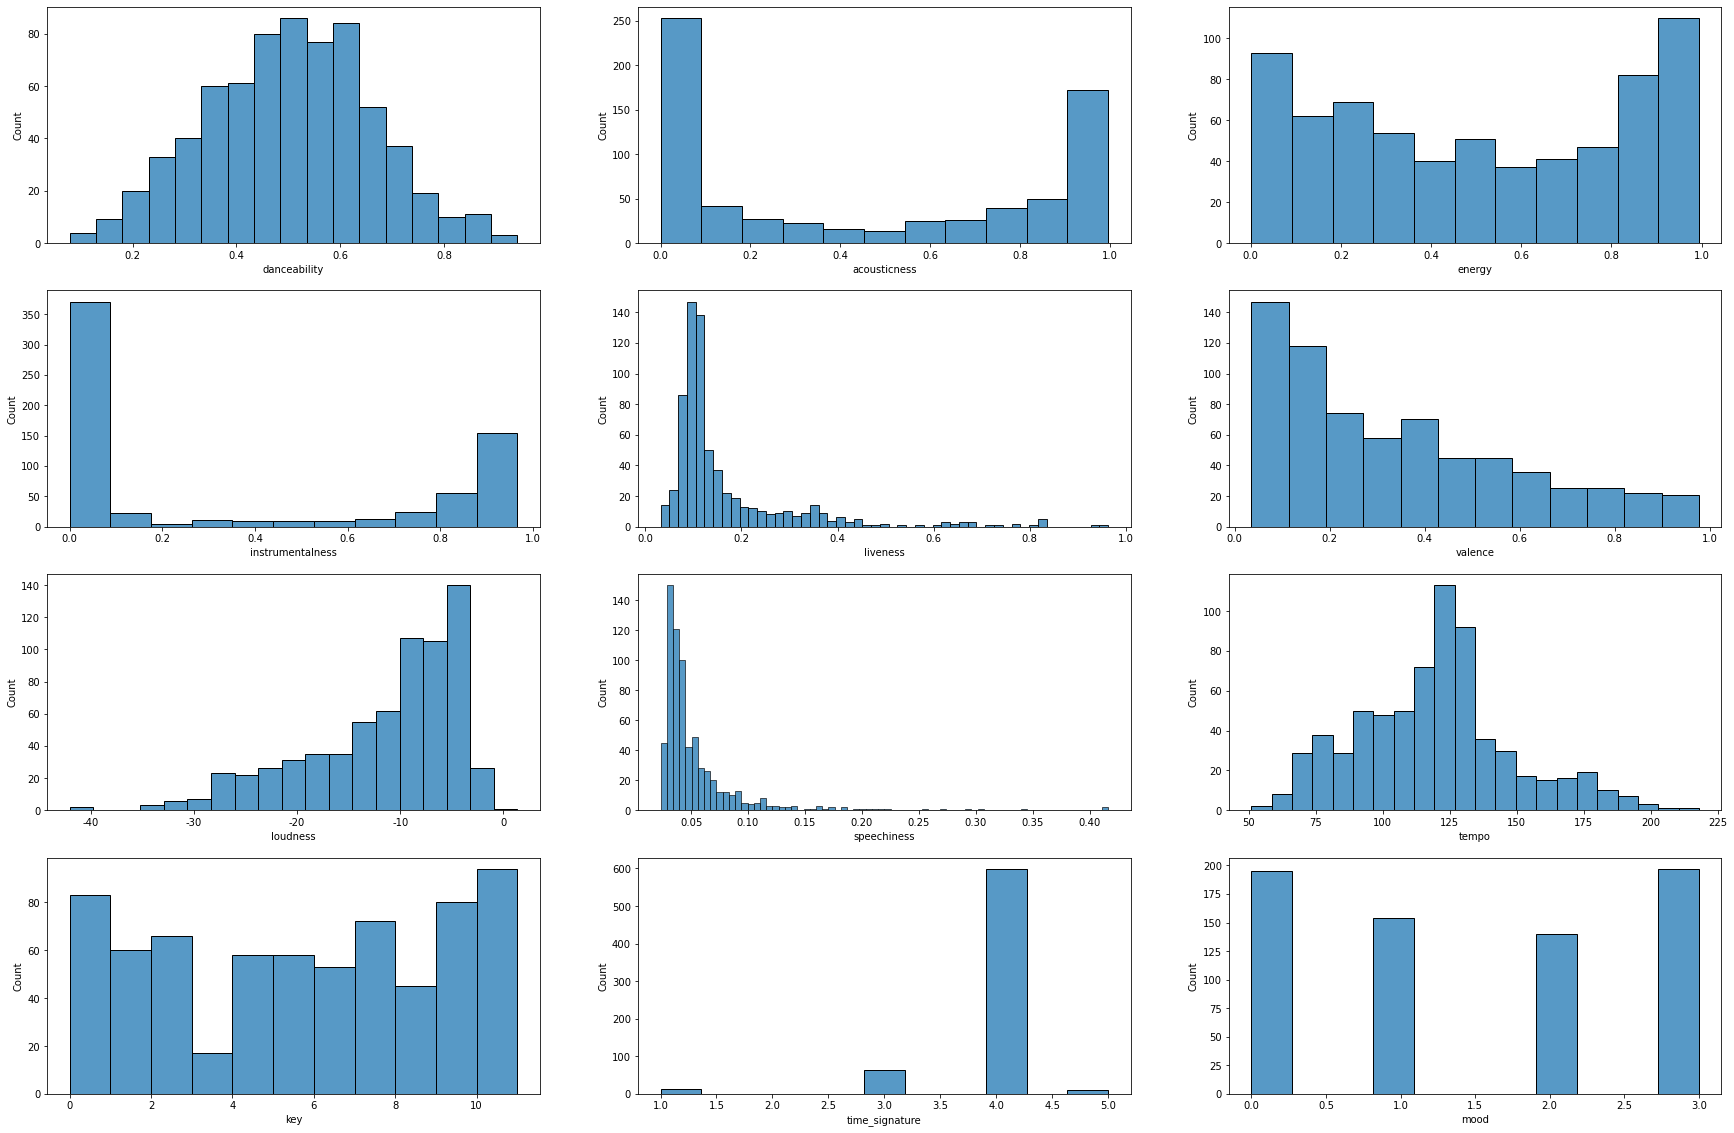

In [53]:
f, ax = plt.subplots(4,3, figsize=(30,20))
ax = ax.flatten()
col_list = list(train.columns)
for i in range(len(col_list)):
  sns.histplot(data=train, x= col_list[i],ax=ax[i])
plt.show()

<AxesSubplot:>

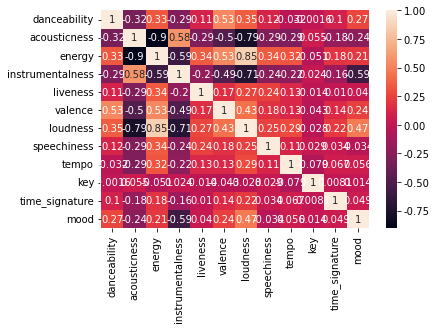

In [54]:
sns.heatmap(train.corr(), annot = True)

## 모델링

In [67]:
!pip install pycaret

  Using cached pycaret-2.3.10-py3-none-any.whl (320 kB)
  Using cached pandas_profiling-3.3.0-py2.py3-none-any.whl (268 kB)
  Using cached umap_learn-0.5.3-py3-none-any.whl
  Using cached scipy-1.5.4-cp39-cp39-win_amd64.whl (31.4 MB)
  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)
  Using cached pyod-1.0.4-py3-none-any.whl
  Using cached mlflow-1.28.0-py3-none-any.whl (17.0 MB)
  Using cached gensim-3.8.3-cp39-cp39-win_amd64.whl
  Using cached numba-0.54.1-cp39-cp39-win_amd64.whl (2.3 MB)
  Using cached cufflinks-0.17.3-py3-none-any.whl
  Using cached wordcloud-1.8.2.2-cp39-cp39-win_amd64.whl (153 kB)
  Using cached PyYAML-5.4.1-cp39-cp39-win_amd64.whl (213 kB)
  Using cached spacy-2.3.7-cp39-cp39-win_amd64.whl (9.4 MB)
  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)
  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Get

  ERROR: Command errored out with exit status 1:
   command: 'C:\ProgramData\Anaconda3\python.exe' 'C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' build_wheel 'C:\Users\MULTIC~1\AppData\Local\Temp\tmp1g_d807e'
       cwd: C:\Users\multicampus\AppData\Local\Temp\pip-install-8ikm1nzr\scikit-learn_a169346950924fae800ebe1cbb20e2d7
  Complete output (1911 lines):
  Partial import of sklearn during the build process.
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  C:\Users\multicampus\AppData\Local\Temp\pip-build-env-mpd42s4d\overlay\Lib\site-packages\setuptools\_distutils\_msvccompiler.py:539: UserWarning: Fallback spawn triggered. Please update distutils monkeypatch.
    warnings.warn("Fallback spawn triggered. Please update distutils monkeypatch.")
  C:\Program Files (x86)\Microsoft Visual Studio\2017\WDExpress\VC\Tools\MSVC\14.16.27023\bin\HostX86\x64\cl.exe /c /nologo /O2 /W3 /GL /DNDEBUG /MD -IC:\Pr


  Using cached mlxtend-0.19.0-py2.py3-none-any.whl (1.3 MB)
  Using cached numpy-1.20.3-cp39-cp39-win_amd64.whl (13.7 MB)
  Using cached llvmlite-0.37.0-cp39-cp39-win_amd64.whl (17.0 MB)
  Using cached pydantic-1.9.2-cp39-cp39-win_amd64.whl (2.0 MB)
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached missingno-0.5.1-py3-none-any.whl (8.7 kB)
  Using cached htmlmin-0.1.12-py3-none-any.whl
  Using cached multimethod-1.8-py3-none-any.whl (9.8 kB)
  Using cached tangled_up_in_unicode-0.2.0-py3-none-any.whl (4.7 MB)
  Using cached phik-0.12.2-cp39-cp39-win_amd64.whl (685 kB)
  Using cached ImageHash-4.3.0-py2.py3-none-any.whl (296 kB)
  Using cached preshed-3.0.7-cp39-cp39-win_amd64.whl (96 kB)
  Using cached srsly-1.0.5-cp39-cp39-win_amd64.whl (177 kB)
  Using cached murmurhash-1.0.8-cp39-cp39-win_amd64.whl (18 kB)
  Using cached blis-0.7.8-cp39-cp39-win_amd64.whl (6.6 MB)
  Using cached catalogue-1.0.0-py2.py3-none-any.whl (7.7 kB)
  Using cached cymem-2.0.6-cp39-cp39-w

  copying sklearn\compose\_target.py -> build\lib.win-amd64-cpython-39\sklearn\compose
  copying sklearn\compose\__init__.py -> build\lib.win-amd64-cpython-39\sklearn\compose
  creating build\lib.win-amd64-cpython-39\sklearn\compose\tests
  copying sklearn\compose\tests\test_column_transformer.py -> build\lib.win-amd64-cpython-39\sklearn\compose/tests
  copying sklearn\compose\tests\test_target.py -> build\lib.win-amd64-cpython-39\sklearn\compose/tests
  copying sklearn\compose\tests\__init__.py -> build\lib.win-amd64-cpython-39\sklearn\compose/tests
  creating build\lib.win-amd64-cpython-39\sklearn\covariance
  copying sklearn\covariance\elliptic_envelope.py -> build\lib.win-amd64-cpython-39\sklearn\covariance
  copying sklearn\covariance\empirical_covariance_.py -> build\lib.win-amd64-cpython-39\sklearn\covariance
  copying sklearn\covariance\graph_lasso_.py -> build\lib.win-amd64-cpython-39\sklearn\covariance
  copying sklearn\covariance\robust_covariance.py -> build\lib.win-amd64-c

  Using cached funcy-1.17-py2.py3-none-any.whl (33 kB)
  Using cached pyLDAvis-3.3.0.tar.gz (1.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached pyLDAvis-3.2.2-py2.py3-none-any.whl
  Using cached pynndescent-0.5.7-py3-none-any.whl
Failed to build scikit-learn


  copying build\lib.win-amd64-cpython-39\sklearn\linear_model\_glm\tests\test_link.py -> build\bdist.win-amd64\wheel\.\sklearn\linear_model\_glm\tests
  copying build\lib.win-amd64-cpython-39\sklearn\linear_model\_glm\tests\__init__.py -> build\bdist.win-amd64\wheel\.\sklearn\linear_model\_glm\tests
  copying build\lib.win-amd64-cpython-39\sklearn\linear_model\_glm\__init__.py -> build\bdist.win-amd64\wheel\.\sklearn\linear_model\_glm
  copying build\lib.win-amd64-cpython-39\sklearn\linear_model\_huber.py -> build\bdist.win-amd64\wheel\.\sklearn\linear_model
  copying build\lib.win-amd64-cpython-39\sklearn\linear_model\_least_angle.py -> build\bdist.win-amd64\wheel\.\sklearn\linear_model
  copying build\lib.win-amd64-cpython-39\sklearn\linear_model\_logistic.py -> build\bdist.win-amd64\wheel\.\sklearn\linear_model
  copying build\lib.win-amd64-cpython-39\sklearn\linear_model\_omp.py -> build\bdist.win-amd64\wheel\.\sklearn\linear_model
  copying build\lib.win-amd64-cpython-39\sklearn\l

  copying build\lib.win-amd64-cpython-39\sklearn\svm\_classes.py -> build\bdist.win-amd64\wheel\.\sklearn\svm
  copying build\lib.win-amd64-cpython-39\sklearn\svm\_liblinear.cp39-win_amd64.pyd -> build\bdist.win-amd64\wheel\.\sklearn\svm
  copying build\lib.win-amd64-cpython-39\sklearn\svm\_libsvm.cp39-win_amd64.pyd -> build\bdist.win-amd64\wheel\.\sklearn\svm
  copying build\lib.win-amd64-cpython-39\sklearn\svm\_libsvm_sparse.cp39-win_amd64.pyd -> build\bdist.win-amd64\wheel\.\sklearn\svm
  copying build\lib.win-amd64-cpython-39\sklearn\svm\__init__.py -> build\bdist.win-amd64\wheel\.\sklearn\svm
  creating build\bdist.win-amd64\wheel\sklearn\tests
  copying build\lib.win-amd64-cpython-39\sklearn\tests\test_base.py -> build\bdist.win-amd64\wheel\.\sklearn\tests
  copying build\lib.win-amd64-cpython-39\sklearn\tests\test_build.py -> build\bdist.win-amd64\wheel\.\sklearn\tests
  copying build\lib.win-amd64-cpython-39\sklearn\tests\test_calibration.py -> build\bdist.win-amd64\wheel\.\skl

In [66]:
pip list

Package                       Version
----------------------------- --------------------
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.1.4
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
bea

In [65]:
from pycaret.regression import *

ModuleNotFoundError: No module named 'pycaret'

In [61]:
df = setup(data = train, target = 'mood', train_size=0.8, session_id = 1115)

  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
  Missing compiler_cxx fix for MSVCCompiler
  customize MSVCCompiler using build_clib
  building 'libsvm-skl' library
  compiling C sources
  creating build\temp.win-amd64-cpython-39
  creating build\temp.win-amd64-cpython-39\sklearn
  creating build\temp.win-amd64-cpython-39\sklearn\svm
  creating build\temp.win-amd64-cpython-39\sklearn\svm\src
  creating build\temp.win-amd64-cpython-39\sklearn\svm\src\libsvm
  C:\Program Files (x86)\Microsoft Visual Studio\2017\WDExpress\VC\Tools\MSVC\14.16.27023\bin\HostX86\x64\cl.exe /c /nologo /O2 /W3 /GL /DNDEBUG /MD -IC:\Users\multicampus\AppData\Local\Temp\pip-build-env-bsyucb2_\overlay\Lib\site-packages\numpy\core\include -IC:\Program Files (x86)\Microsoft Visual Studio\2017\WDExpress\VC\Tools\MSVC\14.16.27023\include -IC:\Program Files (x86)\Windows Kits\NETFXSDK\4.6.1\include\um -IC:\Program Files (x86)\Windows Kits\10\include

NameError: name 'setup' is not defined


  C:\Program Files (x86)\Microsoft Visual Studio\2017\WDExpress\VC\Tools\MSVC\14.16.27023\bin\HostX86\x64\link.exe /nologo /INCREMENTAL:NO /LTCG /DLL /MANIFEST:EMBED,ID=2 /MANIFESTUAC:NO /LIBPATH:C:\ProgramData\Anaconda3\libs /LIBPATH:C:\ProgramData\Anaconda3 /LIBPATH:C:\ProgramData\Anaconda3\PCbuild\amd64 /LIBPATH:build\temp.win-amd64-cpython-39 /LIBPATH:C:\Program Files (x86)\Microsoft Visual Studio\2017\WDExpress\VC\Tools\MSVC\14.16.27023\lib\x64 /LIBPATH:C:\Program Files (x86)\Windows Kits\NETFXSDK\4.6.1\lib\um\x64 /LIBPATH:C:\Program Files (x86)\Windows Kits\10\lib\10.0.17763.0\ucrt\x64 /LIBPATH:C:\Program Files (x86)\Windows Kits\10\lib\10.0.17763.0\um\x64 /EXPORT:PyInit__svmlight_format_fast build\temp.win-amd64-cpython-39\Release\sklearn\datasets\_svmlight_format_fast.obj /OUT:build\lib.win-amd64-cpython-39\sklearn\datasets\_svmlight_format_fast.cp39-win_amd64.pyd /IMPLIB:build\temp.win-amd64-cpython-39\Release\sklearn\datasets\_svmlight_format_fast.cp39-win_amd64.lib /openmp


In [64]:
df

,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,0.486,0.166,0.449,2.23e-06,0.54,0.549,-10.298,0.0267,100.456,5,4,NaN
1,0.756,0.582,0.401,0.011,0.0541,0.514,-10.702,0.0526,101.954,7,4,NaN
2,0.601,0.432,0.532,6.25e-06,0.0925,0.341,-9.119,0.0286,136.571,10,4,NaN
3,0.598,0.13,0.676,0.225,0.112,0.805,-9.211,0.0279,114.169,0,4,NaN
4,0.379,0.806,0.343,0,0.0991,0.694,-12.993,0.0385,184.301,10,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
82010,0.822,0.165,0.719,2.48e-05,0.174,0.659,-3.633,0.0576,82.01,10,4,NaN
82011,0.935,0.0192,0.849,0,0.0223,0.551,-3.047,0.0779,119.986,7,4,NaN
82012,0.514,0.0105,0.611,0,0.312,0.311,-8.227,0.287,108.666,4,5,NaN
82013,0.938,0.117,0.606,0,0.528,0.706,-6.396,0.419,121.108,6,4,NaN


In [63]:
best_1 = compare_models(sort='MAE')

NameError: name 'compare_models' is not defined

In [ ]:
best_2 = compare_models(sort='RMSE')

In [ ]:
best_3 = compare_models(sort='MSE')


  C:\Program Files (x86)\Microsoft Visual Studio\2017\WDExpress\VC\Tools\MSVC\14.16.27023\bin\HostX86\x64\link.exe /nologo /INCREMENTAL:NO /LTCG /DLL /MANIFEST:EMBED,ID=2 /MANIFESTUAC:NO /LIBPATH:C:\ProgramData\Anaconda3\libs /LIBPATH:C:\ProgramData\Anaconda3 /LIBPATH:C:\ProgramData\Anaconda3\PCbuild\amd64 /LIBPATH:build\temp.win-amd64-cpython-39 /LIBPATH:C:\Program Files (x86)\Microsoft Visual Studio\2017\WDExpress\VC\Tools\MSVC\14.16.27023\lib\x64 /LIBPATH:C:\Program Files (x86)\Windows Kits\NETFXSDK\4.6.1\lib\um\x64 /LIBPATH:C:\Program Files (x86)\Windows Kits\10\lib\10.0.17763.0\ucrt\x64 /LIBPATH:C:\Program Files (x86)\Windows Kits\10\lib\10.0.17763.0\um\x64 /EXPORT:PyInit__expected_mutual_info_fast build\temp.win-amd64-cpython-39\Release\sklearn\metrics\cluster\_expected_mutual_info_fast.obj /OUT:build\lib.win-amd64-cpython-39\sklearn\metrics\cluster\_expected_mutual_info_fast.cp39-win_amd64.pyd /IMPLIB:build\temp.win-amd64-cpython-39\Release\sklearn\metrics\cluster\_expected_mut

In [62]:
best_1

NameError: name 'best_1' is not defined